## Nolan Karsok Machine Learning Course Project

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
#Data Preprocessing Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import graphviz
from imblearn.over_sampling import RandomOverSampler

#Model Building Packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC

#Model Evaluation Packages
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

In [114]:
# Load the dataset
df = pd.read_csv('C:/Users/nkars/OneDrive/Documents/Machine Learning/Course Project/survey lung cancer.csv')

In [115]:
for categorical_column in df:
    if categorical_column == 'AGE': # Skip the 'AGE' column as it is continuous numerical attribute
        continue
    df[categorical_column]=LabelEncoder().fit_transform(df[categorical_column])

In [116]:
X = df.drop('LUNG_CANCER', axis=1) # Features
y = df['LUNG_CANCER'] # Target variable

In [194]:
# assuming X is the feature matrix and y is the target vector
# instantiate SelectKBest with chi2 scoring function and k=10 (select top 10 features)
selector = SelectKBest(chi2, k=10)

# fit the selector to the data
selector.fit(X, y)

# transform the data to keep only the selected features
X_selected = selector.transform(X)

# get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# print the scores and p-values of each feature
print("Scores:", selector.scores_)
print("P-values:", selector.pvalues_)
print("Selected feature names:", selected_feature_names)

Scores: [ 0.66489923  2.65148811  0.45694567  4.37354798  3.25649906  5.35001379
  1.88141574  2.29293639 14.71795369  8.51461439 11.40541145  8.03232106
  0.40949668 11.06336575  4.96919102]
P-values: [4.14835641e-01 1.03453010e-01 4.99054887e-01 3.65009166e-02
 7.11408605e-02 2.07221069e-02 1.70173327e-01 1.29963840e-01
 1.24851746e-04 3.52305569e-03 7.32304802e-04 4.59499194e-03
 5.22225083e-01 8.80501627e-04 2.58027133e-02]
Selected feature names: Index(['AGE', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'ALLERGY ',
       'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY',
       'CHEST PAIN'],
      dtype='object')


In [195]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (247, 10)
Test shape: (62, 10)


In [196]:
# resample minority class in both test and train
# We do this after the split so that duplicates don't pollute either set
X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)
X_test, y_test = RandomOverSampler().fit_resample(X_test, y_test)
print(f'Train_resampled shape : {X_train.shape}\nTest_resampled shape: {X_test.shape}')

Train_resampled shape : (420, 10)
Test_resampled shape: (120, 10)


EDA

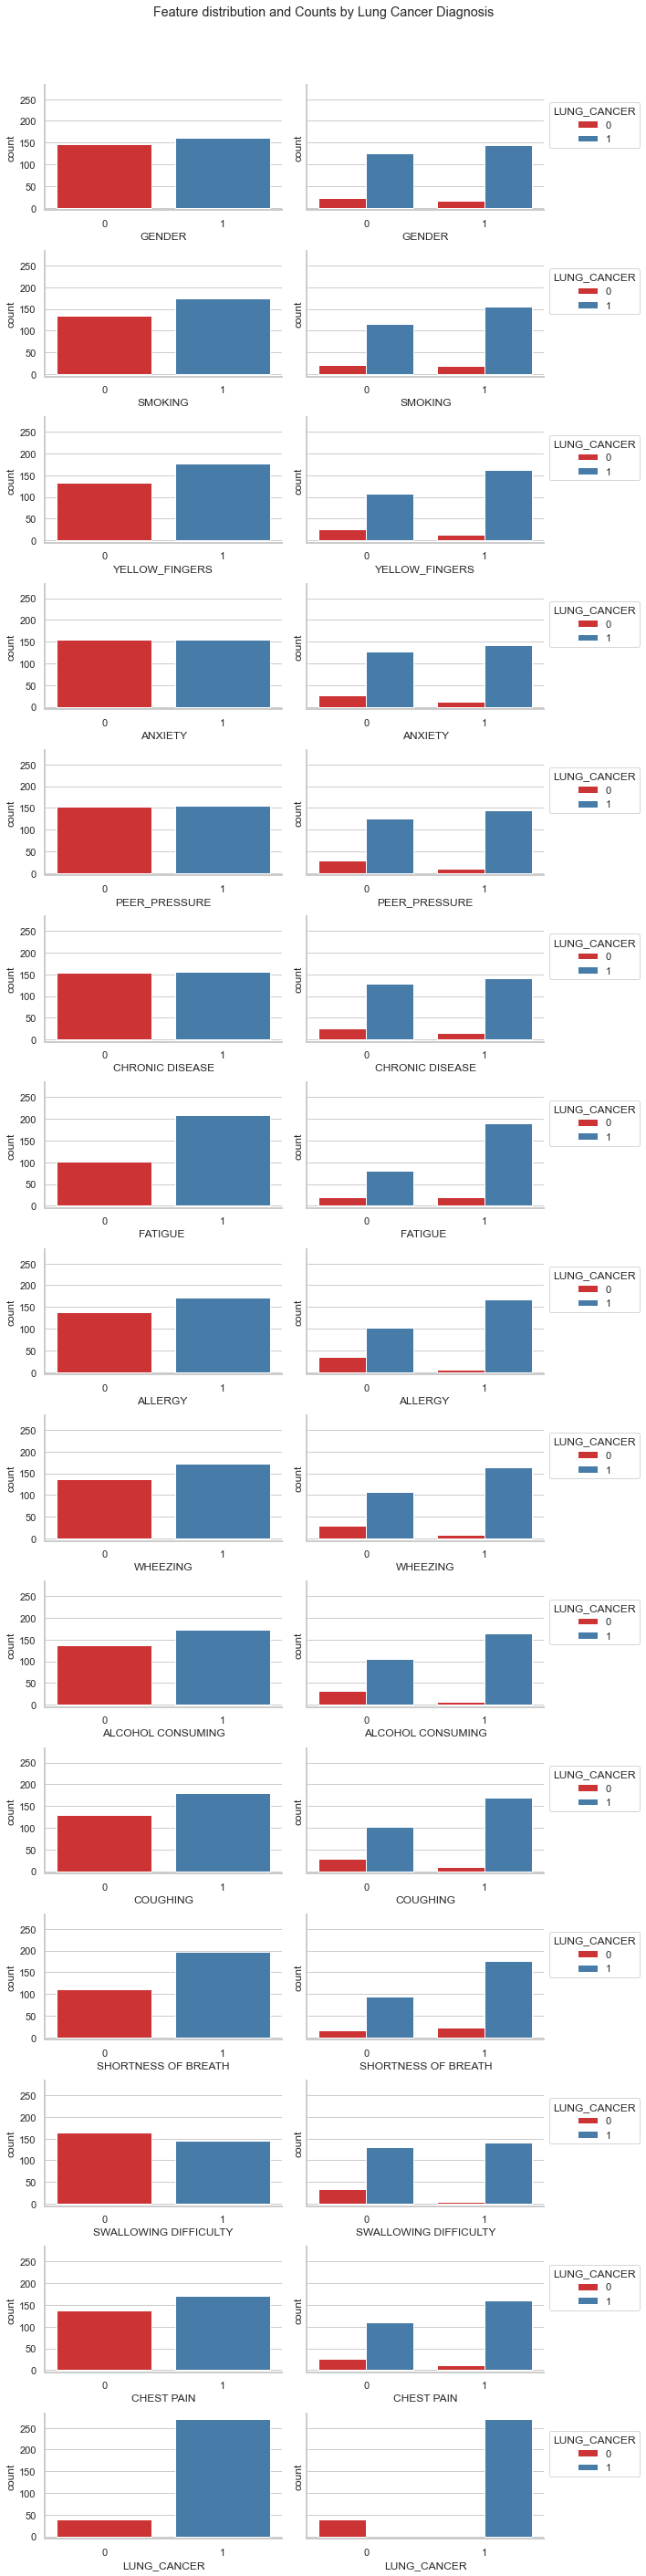

In [119]:
num_features = len(df.columns) - 1 # Exclude age

fig, axs = plt.subplots(num_features, 2, figsize=(10, 40), sharey=True)
# Loop over attributes that are not 'AGE'
cat_attributes = [col for col in df.columns if col != 'AGE']
for i, cat_attr in enumerate(cat_attributes):
        if cat_attr != 'AGE':
            sns.countplot(data=df, x=cat_attr, ax=axs[i, 0], palette='Set1')
            sns.countplot(data=df, x=cat_attr, hue='LUNG_CANCER', ax=axs[i, 1], palette='Set1')
            sns.move_legend(axs[i, 1], bbox_to_anchor=(1,0.9),loc='upper left')

for ax in axs.flatten():
        # Adjust the bottom of the plot to the x-axis with a tiny space
        y_bounds = ax.get_ybound()
        y_bottom = (y_bounds[0] + y_bounds[1]) / 50 * -1
        ax.set_ylim(y_bottom, ax.get_ybound()[1])
        # Remove or enhance plot spines (bounding box)
        for spine in ['top', 'right']:
            ax.spines[spine].set_linewidth(0)
        for spine in ['bottom', 'left']:
            ax.spines[spine].set_linewidth(2)
plt.suptitle("Feature distribution and Counts by Lung Cancer Diagnosis")
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

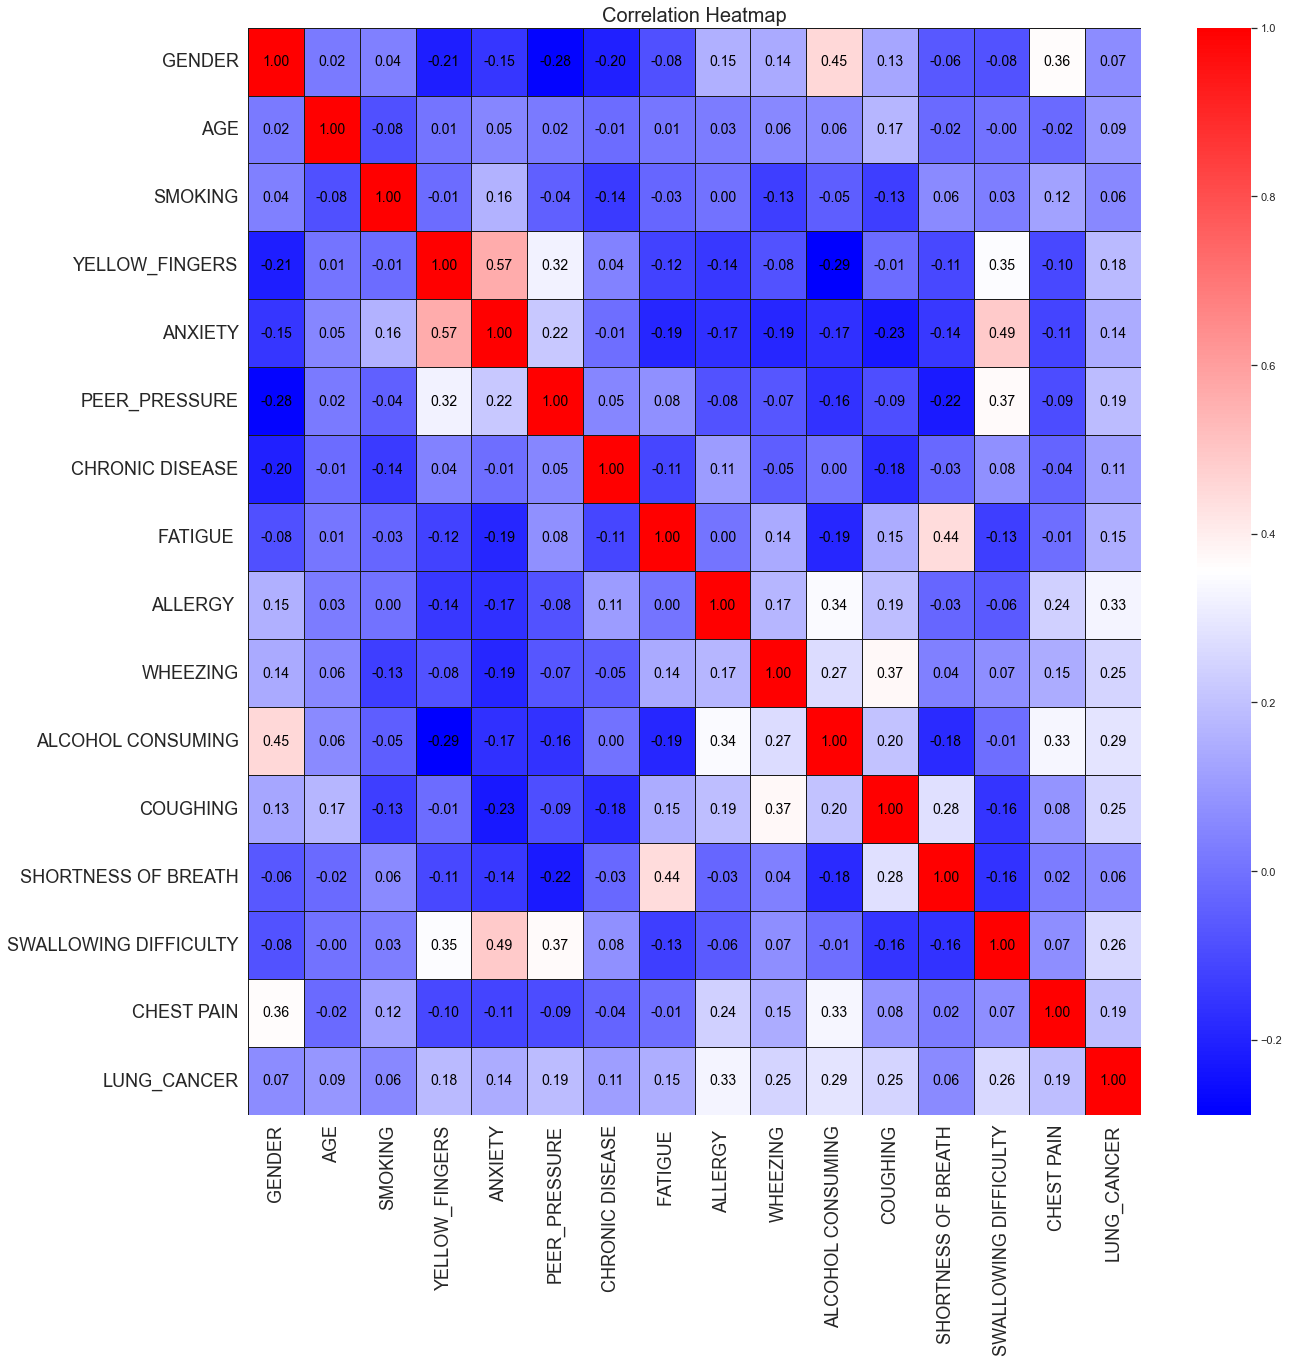

In [120]:
# Create a correlation matrix using Pandas corr() method
corr_matrix = df.corr()

# Create a heatmap using Seaborn heatmap() method
fig, axs = plt.subplots(figsize=(20,20))

sns.heatmap(corr_matrix, 
            annot=True, 
            linewidth=0.5, 
            linecolor='k', 
            fmt='0.2f', 
            annot_kws={"size": 14, "color": "black"}, 
            cmap="bwr")

# Set plot title and labels
plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Show plot
plt.show()

Logistic Regression

In [197]:
# Create a Logistic Regression object
logreg = LogisticRegression()

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = logreg.predict(X_test)

# Print the classification report of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.43      0.58        60
           1       0.63      0.95      0.75        60

    accuracy                           0.69       120
   macro avg       0.76      0.69      0.67       120
weighted avg       0.76      0.69      0.67       120



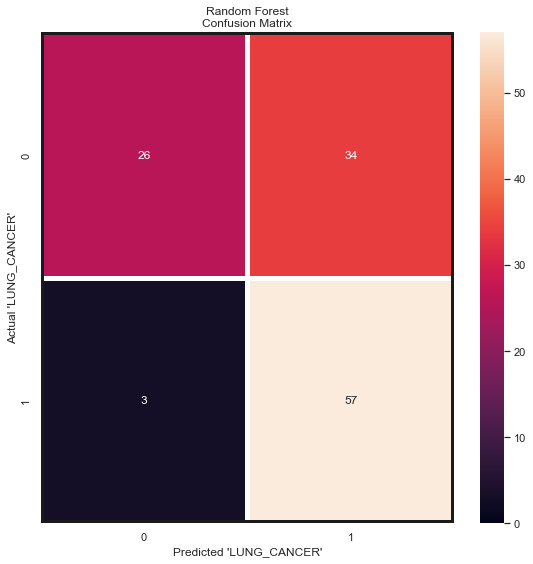

In [198]:
fig, axs = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidth=5, vmin=0, cmap='rocket', ax=axs)
axs.set_title('Random Forest\nConfusion Matrix')
axs.set_xlabel("Predicted 'LUNG_CANCER'")
axs.set_ylabel("Actual 'LUNG_CANCER'")
# Style baby! yeah!
axs.axhline(y=0, color='k',linewidth=5)
axs.axhline(y=confusion_matrix(y_test, y_pred).shape[1], color='k',linewidth=7)
axs.axvline(x=0, color='k',linewidth=5)
axs.axvline(x=confusion_matrix(y_test, y_pred).shape[0], color='k',linewidth=7)
# Nothing but the classics
plt.tight_layout()
plt.show()

In [199]:
# Get the recall score for the positive class (assuming class 1 is the positive class)
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred, labels=1)
logreg_avg_recall = recall_score(y_test, y_pred, average='weighted')

K-Nearest Neighbor

In [200]:
# Create a KNN object
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.43      0.57        60
           1       0.61      0.90      0.73        60

    accuracy                           0.67       120
   macro avg       0.71      0.67      0.65       120
weighted avg       0.71      0.67      0.65       120



In [201]:
# Get the recall score for the positive class (assuming class 1 is the positive class)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred, labels=1)
knn_avg_recall = recall_score(y_test, y_pred, average='weighted')

Random Forest

In [202]:
# Create a Random Forest object
n_estimators = 100
rf = RandomForestClassifier(n_estimators=n_estimators)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        60
           1       0.63      0.97      0.76        60

    accuracy                           0.70       120
   macro avg       0.78      0.70      0.68       120
weighted avg       0.78      0.70      0.68       120



In [203]:
# Get the recall score for the positive class (assuming class 1 is the positive class)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred, labels=1)
rf_avg_recall = recall_score(y_test, y_pred, average='weighted')

Gradient Boosting

In [204]:
# Create a Gradient Boosting object
n_estimators = 100
gb = GradientBoostingClassifier(n_estimators=n_estimators)

# Train the model using the training sets
gb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        60
           1       0.63      0.97      0.76        60

    accuracy                           0.70       120
   macro avg       0.78      0.70      0.68       120
weighted avg       0.78      0.70      0.68       120



In [205]:
# Get the recall score for the positive class (assuming class 1 is the positive class)
gb_accuracy = accuracy_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred, labels=1)
gb_avg_recall = recall_score(y_test, y_pred, average='weighted')

Support Vector Machine

In [206]:
# Create a Support Vector Machine object
svm = SVC()

# Train the model using the training sets
svm.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.43      0.48        60
           1       0.52      0.62      0.56        60

    accuracy                           0.53       120
   macro avg       0.53      0.53      0.52       120
weighted avg       0.53      0.53      0.52       120



In [207]:
# Get the recall score for the positive class (assuming class 1 is the positive class)
svm_accuracy = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred, labels=1)
svm_avg_recall = recall_score(y_test, y_pred, average='weighted')

Decision Tree

In [218]:
# Create a Decision Tree object
dt = DecisionTreeClassifier()

# Train the model using the training sets
dt.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        60
           1       0.63      0.97      0.76        60

    accuracy                           0.70       120
   macro avg       0.78      0.70      0.68       120
weighted avg       0.78      0.70      0.68       120



In [209]:
# Get the recall score for the positive class (assuming class 1 is the positive class)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred, labels=1)
dt_avg_recall = recall_score(y_test, y_pred, average='weighted')

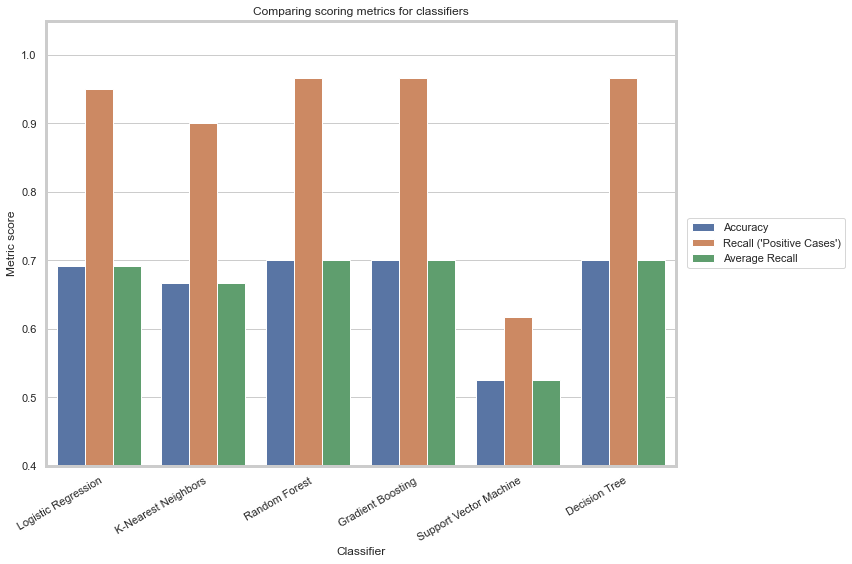

In [210]:
metric_scores = {
    'Classifier':['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Decision Tree'],
    'Accuracy':[logreg_accuracy, knn_accuracy, rf_accuracy, gb_accuracy, svm_accuracy, dt_accuracy],
    "Recall ('Positive Cases')":[logreg_recall, knn_recall, rf_recall, gb_recall, svm_recall, dt_recall],
    'Average Recall':[logreg_avg_recall, knn_avg_recall, rf_avg_recall, gb_avg_recall, svm_avg_recall, dt_avg_recall],
}

metric_scores = pd.DataFrame(data=metric_scores)
metric_scores = pd.melt(metric_scores, id_vars='Classifier')
metric_scores.rename(columns={'variable':'Metric'}, inplace=True)

fig, axs = plt.subplots(figsize=(12,8))
sns.barplot(data=metric_scores, x='Classifier', y='value', hue='Metric', ax=axs)
axs.set_xticklabels(axs.get_xticklabels(), rotation=30, horizontalalignment='right', rotation_mode='anchor')
axs.set_ylabel('Metric score')
axs.set_title('Comparing scoring metrics for classifiers')
axs.set_ylim(0.40, 1.05)
for spine in ['left', 'top', 'right', 'bottom']:
    axs.spines[spine].set_linewidth(3), 
plt.legend(bbox_to_anchor=[1.01, 0.5], loc='center left')
plt.tight_layout()
plt.show()

In [212]:
# logistic regression
lr_classifier = LogisticRegression()
lr_scores = cross_val_score(lr_classifier, X, y, cv=10)
print("Logistic Regression Mean CV score:", lr_scores.mean())

# k-nearest neighbors
knn_classifier = KNeighborsClassifier()
knn_scores = cross_val_score(knn_classifier, X, y, cv=10)
print("K-Nearest Neighbors Mean CV score:", knn_scores.mean())

# random forest
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_scores = cross_val_score(rf_classifier, X, y, cv=10)
print("Random Forest Mean CV score:", rf_scores.mean())

# gradient boosting
gb_classifier = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_classifier, X, y, cv=10)
print("Gradient Boosting Mean CV score:", gb_scores.mean())

# support vector machine
svm_classifier = SVC()
svm_scores = cross_val_score(svm_classifier, X, y, cv=10)
print("Support Vector Machine Mean CV score:", svm_scores.mean())

# decision tree
dt_classifier = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_classifier, X, y, cv=10)
print("Decision Tree Mean CV score:", dt_scores.mean())

Logistic Regression Mean CV score: 0.9224731182795699
K-Nearest Neighbors Mean CV score: 0.8706451612903224
Random Forest Mean CV score: 0.9160215053763441
Gradient Boosting Mean CV score: 0.8933333333333333
Support Vector Machine Mean CV score: 0.8738709677419354
Decision Tree Mean CV score: 0.9


In [213]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Choose the features to be used in the model
features = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 
            'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 
            'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']


# Train the model on the entire dataset
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

# Define a function to ask the questions and get the responses
def ask_questions():
    # Ask the questions and get the responses here
    answers = []
    print("Answer the following questions using 0 for No and 1 for Yes (Gender: 0 = Female, 1 = Male)")
    for feature in features:
        answer = input(f"{feature}: ")
        answers.append(answer)
    return np.array(answers).reshape(1, -1)

# Use the predict_proba function to get the probability of being labeled as 1
answers = ask_questions()
probabilities = model.predict_proba(answers)[:,1]
print(f"Probability of being labeled as 1: {probabilities[0]:.2f}")

Answer the following questions using 0 for No and 1 for Yes (Gender: 0 = Female, 1 = Male)


KeyboardInterrupt: Interrupted by user